# ipywidgets

Jupyter Notebook itself is a static documents. [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) allows us to turn it into interactive dashboards. This tutorial just provides some `ipywidgets` templates you might like.

We're going to get started by loading up necessary modular and specify some example file in my local computer.

In [6]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interactive_output, HBox, VBox
import CactusTool
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/liuyu/simulations/BH/'
sim = CactusTool.load(path)

## Scalar

In [12]:
from CactusTool import TimeSeries

ds = sim.Scalar

chapter=widgets.Label(value='CarpetIOScalar:')
reduction_item = widgets.Dropdown(options=ds.available_reductions, description='Reduction:')
var_item = widgets.Dropdown(options=ds[ds.available_reductions[0]].available_variables, description='Variable:')
grid_item = widgets.Checkbox(value=True, description='Grid')

# var_item rely on reduction_item
def update_var_item(*args):
    var_item.options = ds[reduction_item.value].available_variables
reduction_item.observe(update_var_item, 'value')

def timeseries(reduction, variable, grid):
    fig, ax = plt.subplots()
    var = ds[reduction][variable]
    ts = TimeSeries(ax, var.t, var.y)
    ts.plot()
    if grid:
        plt.grid()
    plt.show()

output = interactive_output(timeseries, 
                            {
                                'reduction': reduction_item,
                                'variable': var_item, 
                                'grid': grid_item  
                            })

VBox([
    chapter,
    HBox([
        reduction_item,
        var_item,
        grid_item
    ]),
    output
])

# ASCII

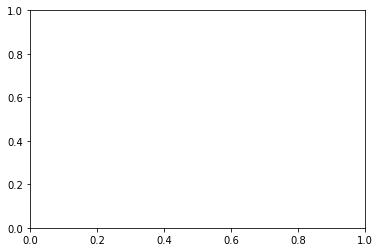

In [11]:
from CactusTool import LinePlot

ds = sim.ASCII

chapter=widgets.Label(value='CarpetIOASCII:')
dim_item = widgets.Dropdown(options=ds.available_dims, description='Dimension:')
var_item = widgets.Dropdown(options=ds[ds.available_dims[0]].available_variables, description='Variable:')
# rl_item = widgets.Dropdown(options=ds[ds.available_dims[0]], description='Dimension:')
interp_item = widgets.Checkbox(value=True, description='Interpolation')

# var_item rely on reduction_item
def update_var_item(*args):
    var_item.options = ds[dim_item.value].available_variables
dim_item.observe(update_var_item, 'value')

def lineplot(dim, variable, grid):
    fig, ax = plt.subplots()
    dataset = ds[dim][variable].dataset()
    ts = TimeSeries(ax, dataset)
    ts.plot(variable)
    if grid:
        plt.grid()
    plt.show()

output = interactive_output(lineplot, 
                            {
                                'dim': dim_item,
                                'variable': var_item, 
                                'grid': grid_item  
                            })

VBox([
    chapter,
    HBox([
        dim_item,
        var_item,
        grid_item
    ]),
    output
])

In [4]:

play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

# HDF5

In [5]:
ds = sim.H5

chapter=widgets.Label(value='CarpetIOHDF5:')
dim_item = widgets.Dropdown(options=ds.available_dims, description='Dimension:')
dim_init = ds.available_dims[0]
var_item = widgets.Dropdown(options=ds[dim_init].available_variables, description='Variable:')
var_init = ds[dim_init].available_variables[0]
# rl_item = widgets.Dropdown(options=ds[dim_init][var_init].hierarchy.keys(), description='refinement level:')
# interp_item = widgets.Checkbox(value=True, description='Interpolation')

# var_item rely on reduction_item
def update_var_item(*args):
    var_item.options = ds[dim_item.value].available_variables
dim_item.observe(update_var_item, 'value')


it = ds[dim_init][var_init].it
it_item = widgets.Play(
    value=50,
    min=min(it),
    max=max(it),
    step=256,
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((it_item, 'value'), (slider, 'value'))


def Plot(dim, variable, it):
    var = ds[dim][variable]
#     print(var.temporary(it=it))
#     print(it)


output = interactive_output(Plot, 
                            {
                                'dim': dim_item,
                                'variable': var_item,
                                'it': it_item,
                            })

VBox([
    chapter,
    HBox([
        dim_item,
        var_item,
    ]),
    output,
    HBox([
        it_item, 
        slider,
    ])
])

NameError: name 'it' is not defined

In [ ]:
# def update_rl_item(*args):
#     rl_item.options = ds[dim_item.value][var_item.value].hierarchy.keys()
# dim_item.observe(update_rl_item, 'value')
# var_item.observe(update_rl_item, 'value')

#     fig, ax = plt.subplots()
#     dataset = ds[reduction][variable].dataset()
#     ts = TimeSeries(ax, dataset)
#     ts.plot(variable)
#     if grid:
#         plt.grid()
#     plt.show()

In [ ]:
ds = sim.H5

chapter=widgets.Label(value='CarpetIOHDF5:')
dim_item = widgets.Dropdown(options=ds.available_dims, description='Dimension:')
var_item = widgets.Dropdown(description='Variable:')

# var_item rely on reduction_item
def update_var_item(*args):
    var_item.options = ds[dim_item.value].available_variables
dim_item.observe(update_var_item, 'value')

def dataset(dim, variable):
    global Dim, Var
    Dim = dim
    Var = variable
    
    
out = interactive_output(dataset, 
                {
                    'dim': dim_item,
                    'variable': var_item
                })

if out:
    var = ds[Dim][Var]
    print(var.dataset)

VBox([
    chapter,
    HBox([
        dim_item,
        var_item,
    ]),
])

In [ ]:
var = sim.H5.xy['H']

In [ ]:


available_it = var.it
it_item = widgets.Play(
    value=0,
    min=min(available_it),
    max=max(available_it),
    step=available_it[1]-available_it[0],
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(
    min=min(available_it),
    max=max(available_it),
    step=available_it[1]-available_it[0]
)
widgets.jslink((it_item, 'value'), (slider, 'value'))

def Show(it):
    AMRGrid = var.temporary(it=it)
    coords = AMRGrid.coords()
    f = AMRGrid.interpolate(coords)
    fig, ax = plt.subplots()
#     ax.pcolormesh(*coords, f)
    ax.imshow(f)
    plt.show()
    
    
output = interactive_output(Show, 
                            {
                                'it': it_item,
                            })

VBox([
    HBox([
        it_item, 
        slider,
    ]),
    output
])